In [48]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

# Check dataset statistics for full Gecko dataset

In [37]:
gecko = pd.read_csv('../data/raw/Gecko/Gecko_to_simpol.csv')
gecko

,compound,SMILES,MACCS,topological,compound.1
0,0,C(=O),0000000000000000000000000000000000100000000000...,0000000000000000000000000000000000000000000000...,0
1,1,C(=O)(N(=O)(=O)),0000000000000000000000001000000000000000000000...,0000000000000000000000000000000000010000000000...,1
2,2,C(=O)(N(=O)(=O))C(=O),0000000000000000000000001000000000000000000000...,0000000000000000000000000000000000010000000000...,2
3,3,C(=O)(N(=O)(=O))C(=O)(O),0000000000000000000000001000000000000000000000...,0000000000000000000000000000000000010000000100...,3
4,4,C(=O)(N(=O)(=O))C(=O)(OO),0000000000000000000000001000000000000000000000...,0000000000000000000000000000000000010000000100...,4
...,...,...,...,...,...
166429,166429,CC1(O)C(O)(C(=O)(OON(=O)(=O)))OOC1C(O)C(=O)(OO...,0000000000000000000000001000000000000000000000...,1000000010001111001011011100000100100010000101...,166429
166430,166430,CC1(O)C(O)(C(=O)(OON(=O)(=O)))OOC1C(O)C(=O),0000000000000000000000001000000000000000000000...,1000000010001111001011011100000100000010000101...,166430
166431,166431,CC1(O)C(O)(C(=O)(OON(=O)(=O)))OOC1C(=O)C(=O),0000000000000000000000001000000000000000000000...,1000000000000111001011011100000100000010010101...,166431
166432,166432,CC1(O)C(O)(C(=O)(OON(=O)(=O)))OOC1C(=O)(OON(=O...,0000000000000000000000001000000000000000000000...,0000000010001011001011011100000100000010000101...,166432


In [41]:
gecko['SMILES'].to_csv('../data/processed/SMILES_gecko.csv', index=False)

In [1]:
run ../src/features/generate_simpol_groups.py -d ../data/processed/ -s SMILES_gecko.csv  -g ../src/aprl_ssp/SMARTSpatterns/SIMPOLgroups_sane.csv

ModuleNotFoundError: No module named 'aprl_ssp'

In [43]:
run ../src/features/generate_mw.py -s SMILES_gecko.csv -d ../data/processed --include_hydrogens

Molar mass data saved to: ../data/processed/SMILES_gecko_molar_mass.csv
Atom count data saved to: ../data/processed/SMILES_gecko_atom_counts.csv


In [53]:
run ../src/visualization/plot_fungroups_molsizes.py SMILES_gecko --output_dir ../reports/ --label_fontsize 14 --title_fontsize 14  

Plots saved to: ../reports/


# Derivatize the Wang dataset

In [ ]:
run ../src/data/make_TMS_derivative.py -i ../data/raw/Wang/SMILES.csv -o der_stats.csv

# Gather dataset statistics of molecular size and functional groups

## Original SMILES

In [ ]:
run ../src/features/generate_simpol_groups.py -d ../data/processed/ -s SMILES_can.csv  -g ../src/aprl_ssp/SMARTSpatterns/SIMPOLgroups_sane.csv

In [ ]:
run ../src/features/generate_mw.py -s SMILES_can.csv -d ../data/processed --include_hydrogens

## Derivitized SMILES

In [ ]:
run ../src/features/generate_simpol_groups.py -d ../data/processed/ -s SMILES_TMS.csv -g ../src/aprl_ssp/SMARTSpatterns/SIMPOLgroups_sane.csv

In [ ]:
run ../src/features/generate_mw.py -s SMILES_TMS.csv -d ../data/processed --include_hydrogens

# Plot dataset statistics (SIMPOL groups and molecular weight histogram)

## Original SMILES

In [51]:
run ../src/visualization/plot_fungroups_molsizes.py SMILES_can --output_dir ../reports/org_wang_plots/ --label_fontsize 14 --title_fontsize 14  

Plots saved to: ../reports/org_wang_plots/


## Derivatized SMILES

In [ ]:
run ../src/visualization/plot_fungroups_molsizes.py SMILES_TMS --output_dir ../reports/tms_wang_plots/

# Validation of derivitization: Ljoncheva et al. test set

In [ ]:
df = pd.read_excel('../data/raw/Ljoncheva/raw/Metadata_test_TMS derivatives.xlsx')
df.rename(columns={'SMILEs parent': 'SMILES'}, inplace=True)
df['SMILES'].to_csv('../data/raw/Ljoncheva/L_SMILES.csv', index=False)

df.drop('SMILES', axis=1, inplace=True)
df.rename(columns={'SMILEs': 'SMILES'}, inplace=True)
df['SMILES'].to_csv('../data/raw/Ljoncheva/L_SMILES_real.csv', index=False)

In [ ]:
run ../src/data/make_TMS_derivative.py -i ../data/raw/Ljoncheva/L_SMILES.csv -o der_L_stats.csv

In [ ]:
run ../src/data/validate_derivatization.py -r ../data/raw/Ljoncheva/L_SMILES_real.csv -p ../data/raw/Ljoncheva/L_SMILES.csv -s ../data/raw/Ljoncheva/L_SMILES_TMS.csv

## Plot dataset stats: Ljoncheva test sets, parent compounds.

In [ ]:
run ../src/features/generate_simpol_groups.py -o L_SMILES_can_SIMPOL.csv -d ../data/raw/Ljoncheva/ -s L_SMILES_can.csv  -g ../src/aprl_ssp/SMARTSpatterns/SIMPOLgroups_sane.csv

In [ ]:
run ../src/features/generate_mw.py -s L_SMILES_can.csv -d ../data/raw/Ljoncheva/ --include_hydrogens

In [6]:
run ../src/visualization/plot_fungroups_molsizes.py L_SMILES_can --input_dir ../data/raw/Ljoncheva/ --output_dir ../reports/org_Ljoncheva_plots/

Plots saved to: ../reports/org_Ljoncheva_plots/


In [ ]:
from IPython.core.display import display, HTML

display(HTML('''
<style>
    .table {
        font-size: 6px; /* Adjust font size here */
        table-layout: fixed; /* Fix column width */
        overflow: hidden; /* Hides overflow */
    }
</style>
'''))

In [ ]:
run ../src/data/validate_derivatization.py -r ../data/raw/Ljoncheva/L_SMILES_real.csv -p ../data/raw/Ljoncheva/L_SMILES.csv -s ../data/raw/Ljoncheva/L_SMILES_TMS.csv

# Version 2 of the derivitization: no secondary amines, only half of primary ones, all OH 

In [ ]:
 run ../src/data/make_TMS_derivative_v2.py -i SMILES.csv -o der_stats_v2.csv  

<Figure size 1200x800 with 0 Axes>

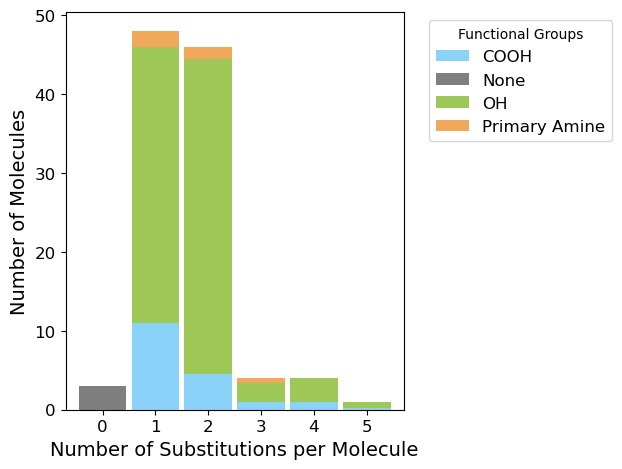

In [22]:
run ../src/data/make_TMS_derivative_v2.py -i ../data/raw/Ljoncheva/L_SMILES.csv -o der_L_stats.csv

In [23]:
run ../src/data/validate_derivatization.py -r ../data/raw/Ljoncheva/L_SMILES_real.csv -p ../data/raw/Ljoncheva/L_SMILES.csv -s der_L_stats.csv

Empty real SMILES at index 98 removed.

Comparison Results:


Real Derivative SMILES,TMS Derivative SMILES,Parent SMILES,Same
CCCCCc1cc(O[Si](C)(C)C)c(C2C=C(C)CCC2C(C)=C)c(O[Si](C)(C)C)c1,CCCCCc1cc(O[Si](C)(C)C)c(C2C=C(C)CCC2C(C)=C)c(O[Si](C)(C)C)c1,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,Yes
C[Si](C)(C)NC(=O)N1c2ccccc2C=Cc3ccccc13,C[Si](C)(C)NC(=O)N1c2ccccc2C=Cc2ccccc21,C1=CC=C2C(=C1)C=CC3=CC=CC=C3N2C(=O)N,Yes
C[Si](C)(C)OC1=CC=CC=C1O[Si](C)(C)C,C[Si](C)(C)Oc1ccccc1O[Si](C)(C)C,C1=CC=C(C(=C1)O)O,Yes
COc1cccc(c1O[Si](C)(C)C)[N+]([O-])=O,COc1cccc([N+](=O)[O-])c1O[Si](C)(C)C,COC1=CC=CC(=C1O)[N+](=O)[O-],Yes
COc1ccc(cc1O[Si](C)(C)C)[N+]([O-])=O,COc1ccc([N+](=O)[O-])cc1O[Si](C)(C)C,COC1=C(C=C(C=C1)[N+](=O)[O-])O,Yes
COc1cc(ccc1O[Si](C)(C)C)[N+]([O-])=O,COc1cc([N+](=O)[O-])ccc1O[Si](C)(C)C,COC1=C(C=CC(=C1)[N+](=O)[O-])O,Yes
C[Si](C)(C)OC(=O)CC(CC(=O)O[Si](C)(C)C)(C(=O)O[Si](C)(C)C)O[Si](C)(C)C \n,C[Si](C)(C)OC(=O)CC(CC(=O)O[Si](C)(C)C)(O[Si](C)(C)C)C(=O)O[Si](C)(C)C,C(C(=O)O)C(CC(=O)O)(C(=O)O)O,Yes
C[Si](C)(C)N[C@@H](CC1=CC=C(C=C1)O[Si](C)(C)C)C(=O)O[Si](C)(C)C,C[Si](C)(C)NC(Cc1ccc(O[Si](C)(C)C)cc1)C(=O)O[Si](C)(C)C,C1=CC(=CC=C1C[C@@H](C(=O)O)N)O,Yes
CC(C)C[C@@H](C(=O)O[Si](C)(C)C)N[Si](C)(C)C,CC(C)CC(N[Si](C)(C)C)C(=O)O[Si](C)(C)C,CC(C)C[C@@H](C(=O)O)N,Yes
C[Si](C)(C)OC[C@@H]([C@@H]1C(=C(C(=O)O1)O[Si](C)(C)C)O[Si](C)(C)C)O[Si](C)(C)C,C[Si](C)(C)OCC(O[Si](C)(C)C)C1OC(=O)C(O[Si](C)(C)C)=C1O[Si](C)(C)C,C([C@@H]([C@@H]1C(=C(C(=O)O1)O)O)O)O,Yes



Statistics:
Total Comparisons: 105
Matches Found: 95
Matches Percentage: 90.48%


# Version 3 of the derivitization: no secondary amines, only half of primary ones, COH 

<Figure size 1200x800 with 0 Axes>

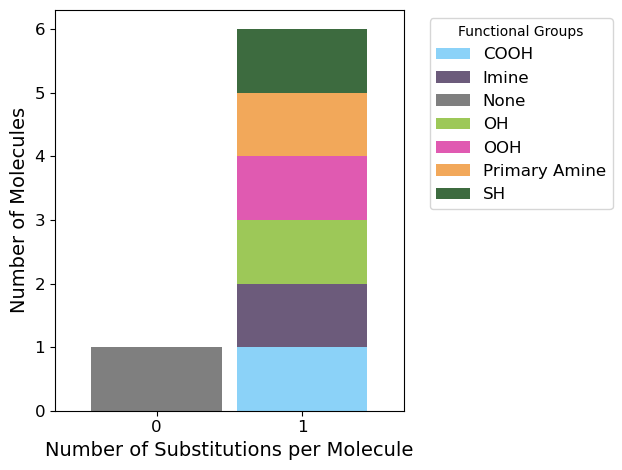

In [15]:
run ../src/data/make_TMS_derivative_v3.py -i SMILES.csv -o der_stats_v3.csv  

<Figure size 1200x800 with 0 Axes>

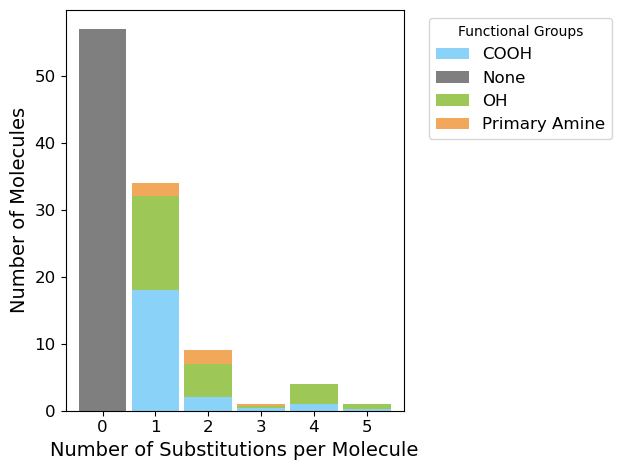

In [25]:
run ../src/data/make_TMS_derivative_v3.py -i ../data/raw/Ljoncheva/L_SMILES.csv -o der_L_stats.csv

In [26]:
run ../src/data/validate_derivatization.py -r ../data/raw/Ljoncheva/L_SMILES_real.csv -p ../data/raw/Ljoncheva/L_SMILES.csv -s der_L_stats.csv

Empty real SMILES at index 98 removed.

Comparison Results:


Real Derivative SMILES,TMS Derivative SMILES,Parent SMILES,Same
CCCCCc1cc(O[Si](C)(C)C)c(C2C=C(C)CCC2C(C)=C)c(O[Si](C)(C)C)c1,CCCCCc1cc(O)c(C2C=C(C)CCC2C(C)=C)c(O)c1,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,Yes
c1(ccc(cc1)Oc1ccc(cc1)O[Si](C)(C)C)O[Si](C)(C)C,Oc1ccc(Oc2ccc(O)cc2)cc1,C1=CC(=CC=C1O)OC2=CC=C(C=C2)O,Yes
Cc1cccc(O[Si](C)(C)C)c1O[Si](C)(C)C,Cc1cccc(O)c1O,CC1=C(C(=CC=C1)O)O,Yes
C[Si](C)(C)OC1=CC=CC=C1O[Si](C)(C)C,Oc1ccccc1O,C1=CC=C(C(=C1)O)O,Yes
COc1cccc(c1O[Si](C)(C)C)[N+]([O-])=O,COc1cccc([N+](=O)[O-])c1O,COC1=CC=CC(=C1O)[N+](=O)[O-],Yes
COc1ccc(cc1O[Si](C)(C)C)[N+]([O-])=O,COc1ccc([N+](=O)[O-])cc1O,COC1=C(C=C(C=C1)[N+](=O)[O-])O,Yes
COc1cc(ccc1O[Si](C)(C)C)[N+]([O-])=O,COc1cc([N+](=O)[O-])ccc1O,COC1=C(C=CC(=C1)[N+](=O)[O-])O,Yes
C[Si](C)(C)OC(=O)CC(CC(=O)O[Si](C)(C)C)(C(=O)O[Si](C)(C)C)O[Si](C)(C)C \n,C[Si](C)(C)OC(=O)CC(CC(=O)O[Si](C)(C)C)(O[Si](C)(C)C)C(=O)O[Si](C)(C)C,C(C(=O)O)C(CC(=O)O)(C(=O)O)O,Yes
C[Si](C)(C)N[C@@H](CC1=CC=C(C=C1)O[Si](C)(C)C)C(=O)O[Si](C)(C)C,C[Si](C)(C)NC(Cc1ccc(O)cc1)C(=O)O[Si](C)(C)C,C1=CC(=CC=C1C[C@@H](C(=O)O)N)O,Yes
CC(C)C[C@@H](C(=O)O[Si](C)(C)C)N[Si](C)(C)C,CC(C)CC(N[Si](C)(C)C)C(=O)O[Si](C)(C)C,CC(C)C[C@@H](C(=O)O)N,Yes



Statistics:
Total Comparisons: 105
Matches Found: 100
Matches Percentage: 95.24%


# Test version 3 on Wang dataset

<Figure size 1200x800 with 0 Axes>

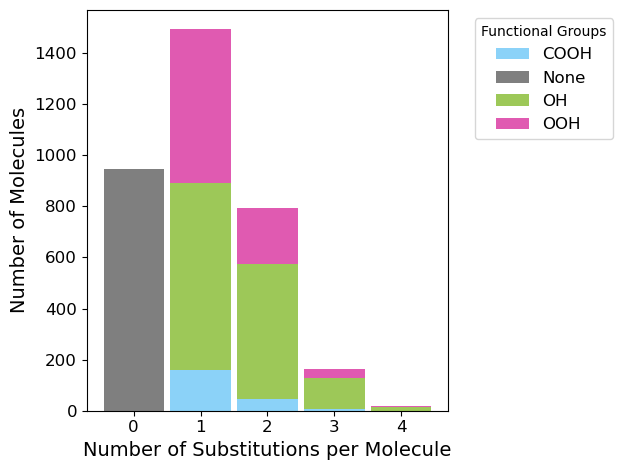

In [7]:
run ../src/data/make_TMS_derivative_v3.py -i ../data/raw/Wang/SMILES.csv -o ../data/raw/Wang/der_stats_wang_v3.csv

In [20]:
run ../src/features/compare_spectra.py --font_size 24 --similarity 'cosine_weighted' --simulated ../data/NEIMS/example/annotated.sdf --reference ../data/NEIMS/example/propane-diol-2tms.msp --output test

Skipping invalid line in SDF: RDKit          3D
Similarity Score using cosine_weighted: 0.80
Mirrored comparison plot saved to test


# Parse and derivitize Franklin et al. 

In [2]:
import pandas as pd
df = pd.read_excel('../data/raw/Franklin/Franklin_Volatility_Parameterization_SMILES_BA_HS-TMS.xlsx')

In [3]:
goamazon_data = df[df['Notes'].values == 'GoAmazon'][df.columns[0:3]]
goamazon_data.to_csv('../data/raw/Franklin/goamazon.csv', index=False)
goamazon_data['SMILES'].to_csv('../data/raw/Franklin/goamazon_SMILES.csv', index=False)

In [15]:
ga_smiles = pd.read_csv('../data/raw/Franklin/goamazon_SMILES.csv')

<Figure size 1200x800 with 0 Axes>

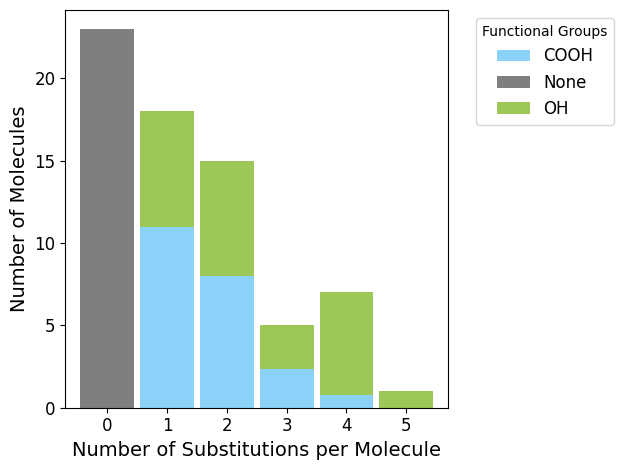

In [4]:
run ../src/data/make_TMS_derivative_v2.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der3-SMILES.csv'  

In [5]:
der_goamazon = pd.read_csv('../data/processed/franklin_goamazon_der3-SMILES.csv')

In [18]:
der_goamazon = der_goamazon.reset_index(drop=True)
goamazon_data = goamazon_data.reset_index(drop=True)
s1 = der_goamazon['Total_Replacements'].reset_index(drop=True)
s2 = goamazon_data['TMS'].reset_index(drop=True)

# Element-wise comparison (returns a Series of True/False for each row)
comparison = s1 == s2
print("Row-wise equality:")
print(comparison)

# Percentage of equality
percentage_equal = comparison.mean() * 100
print(f"\nPercentage of equality: {percentage_equal:.2f}%")

# Find all mismatched rows
mismatches = s1[~comparison]
mismatched_s2 = s2[~comparison]

if not mismatches.empty:
    print("\nMismatched rows:")
    for reset_index in mismatches.index:
        # Map reset indices back to the original indices
        original_index = der_goamazon.index[reset_index]
        
        # Retrieve original 'SMILES' from the DataFrames
        smiles1 = der_goamazon.loc[original_index, 'Modified_SMILES']
        smiles2 = goamazon_data.loc[original_index, 'SMILES']

        # Print mismatch details
        print(f"Index {reset_index} (original index {original_index}): s1 (sim) = {mismatches.loc[reset_index]}, "
              f"s2 (real) = {mismatched_s2.loc[reset_index]}, SMILES s1 (sim) = {smiles1}, SMILES s2 (real) = {smiles2}")
else:
    print("\nNo mismatches found.")


Row-wise equality:
0      True
1      True
2      True
3      True
4      True
      ...  
64     True
65     True
66    False
67    False
68     True
Length: 69, dtype: bool

Percentage of equality: 89.86%

Mismatched rows:
Index 34 (original index 34): s1 (sim) = 2, s2 (real) = 4.0, SMILES s1 (sim) = C[Si](C)(C)OCC(O[Si](C)(C)C)c1ccc(O)c(O)c1, SMILES s2 (real) = OC(C1=CC=C(O)C(O)=C1)CO
Index 35 (original index 35): s1 (sim) = 1, s2 (real) = 2.0, SMILES s1 (sim) = COc1ccc(C=CC(=O)O[Si](C)(C)C)cc1O, SMILES s2 (real) = COC1=C(C=C(C=C1)C=CC(=O)O)O
Index 42 (original index 42): s1 (sim) = 1, s2 (real) = 2.0, SMILES s1 (sim) = C[Si](C)(C)OC(=O)c1cccc(O)c1, SMILES s2 (real) = O=C(O)C1=CC=CC(O)=C1
Index 49 (original index 49): s1 (sim) = 2, s2 (real) = 4.0, SMILES s1 (sim) = C[Si](C)(C)OCC(O[Si](C)(C)C)c1ccc(O)c(O)c1, SMILES s2 (real) = OC(C1=CC=C(O)C(O)=C1)CO
Index 50 (original index 50): s1 (sim) = 0, s2 (real) = 1.0, SMILES s1 (sim) = COc1cc(C=CC=O)ccc1O, SMILES s2 (real) = COC1=CC(C=CC=O

In [19]:
mismatches = s1[~comparison]
mismatches.values

array([2, 1, 1, 2, 0, 2, 2])

# Test version 2 on Franklin: include all OH sub

<Figure size 1200x800 with 0 Axes>

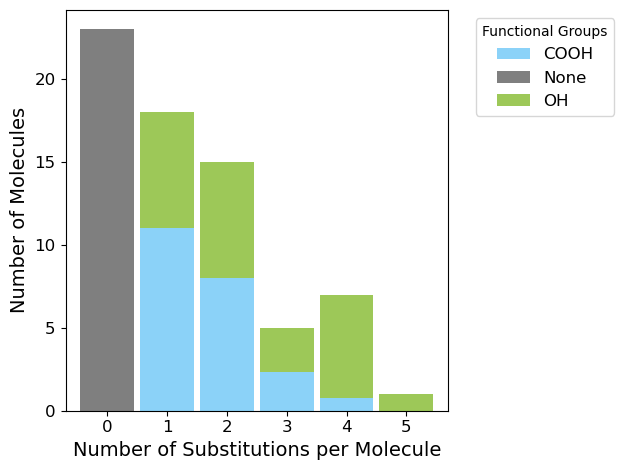

In [39]:
run ../src/data/make_TMS_derivative_v2-.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der2-SMILES.csv'  

In [40]:
der2_goamazon = pd.read_csv('../data/processed/franklin_goamazon_der2-SMILES.csv')

In [41]:
der2_goamazon = der2_goamazon.reset_index(drop=True)
goamazon_data = goamazon_data.reset_index(drop=True)
s1 = der2_goamazon['Total_Replacements'].reset_index(drop=True)
s2 = goamazon_data['TMS'].reset_index(drop=True)

# Element-wise comparison (returns a Series of True/False for each row)
comparison = s1 == s2
print("Row-wise equality:")
print(comparison)

# Percentage of equality
percentage_equal = comparison.mean() * 100
print(f"\nPercentage of equality: {percentage_equal:.2f}%")

# Find all mismatched rows
mismatches = s1[~comparison]
mismatched_s2 = s2[~comparison]

if not mismatches.empty:
    print("\nMismatched rows:")
    for reset_index in mismatches.index:
        # Map reset indices back to the original indices
        original_index = der_goamazon.index[reset_index]
        
        # Retrieve original 'SMILES' from the DataFrames
        smiles1 = der_goamazon.loc[original_index, 'Modified_SMILES']
        smiles2 = goamazon_data.loc[original_index, 'SMILES']

        # Print mismatch details
        print(f"Index {reset_index} (original index {original_index}): s1 (sim) = {mismatches.loc[reset_index]}, "
              f"s2 (real) = {mismatched_s2.loc[reset_index]}, SMILES s1 (sim) = {smiles1}, SMILES s2 (real) = {smiles2}")
else:
    print("\nNo mismatches found.")


Row-wise equality:
0      True
1      True
2      True
3      True
4      True
      ...  
64     True
65     True
66    False
67     True
68     True
Length: 69, dtype: bool

Percentage of equality: 95.65%

Mismatched rows:
Index 7 (original index 7): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = CC1CC(OC(=O)c2ccccc2O)CC(C)(C)C1, SMILES s2 (real) = O=C(OC1CC(C)(C)CC(C)C1)C2=CC=CC=C2O
Index 29 (original index 29): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = COc1cc(O)c(C(C)=O)c(OC)c1, SMILES s2 (real) = OC1=CC(OC)=CC(OC)=C1C(C)=O
Index 66 (original index 66): s1 (sim) = 2, s2 (real) = 0.0, SMILES s1 (sim) = C[Si](C)(C)OC(=O)c1ccccc1C(=O)O[Si](C)(C)C, SMILES s2 (real) = O=C(C1=CC=CC=C1C(O)=O)O


# Revise writing of aromaics

[17:51:19] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 13
[17:51:22] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8


Error processing SMILES 'NC1=CC2=C(C=C1)NC3=C2C=CC=C3': Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 13
Error processing SMILES 'C12=C(NC=C2)C=CC=C1': Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8


<Figure size 1600x1200 with 0 Axes>

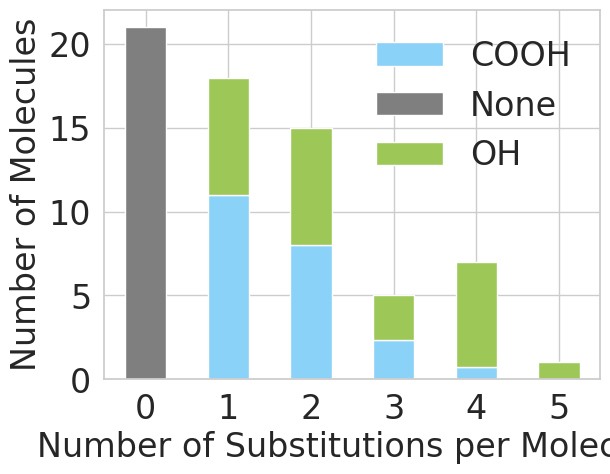

In [6]:
run ../src/data/make_TMS_derivative_v2-arom2.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der2_arom-SMILES.csv'  

##  Make the SMILES list for spectra generation 

In [42]:
der2_goamazon.rename({'Modified_SMILES':'SMILES'}, axis=1, inplace=True)
der2_goamazon['SMILES'].to_csv('../data/NEIMS/Franklin_TMS-v2/SMILES.csv', index=False)

In [43]:
der2_goamazon['SMILES']

0                 CC(C)=CCC/C(C)=C/CC/C(C)=C/CCC(=C)C=C
1                    CC(=O)C=CC1(C)C(=O)C2(CCC1(C)C)CO2
2                         CC1(C)CCC[C@@]2(C)OC(=O)C=C12
3                                  NC1CCC2NC3CCCCC3C2C1
4                         CC(C)CCCC(C)CCCC1(C)CCC(=O)O1
                            ...                        
64                         C[Si](C)(C)OC(=O)C1CCC(=O)N1
65                       CCCOC(=O)C1CCCCC1C(=O)OCC(C)CC
66           C[Si](C)(C)OC(=O)C1CCCCC1C(=O)O[Si](C)(C)C
67    COC1CC(C(CO[Si](C)(C)C)O[Si](C)(C)C)CCC1O[Si](...
68                 C[Si](C)(C)OC(=O)CCC(=O)O[Si](C)(C)C
Name: SMILES, Length: 69, dtype: object